In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Actividad 04: Errores y estabilidad

---
### Profesor: Juan Marcos Marín
### Nombre: Rosa Salazar Miranda
*Métodos computacionales 2024-II*

---

#1. Serie Seno
Considere la serie de Taylor para el seno

$$\sin(x) = \sum^{\infty}_{n=1} (-1)^{n}\frac{x^{2n-1}}{(2n-1)!} $$

a. Defina una función que a partir de la *serie de Taylor* y un valor de $x$ en radianes encuentre el valor de $\sin(x)$.


b. Usando $x$ como `float32` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


c. Ahora, usando $x$ como `float64` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


d. Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

In [ ]:
# Aqui va su código

!pip install numpy
import numpy as np
import math

In [ ]:
#a)
def taylor_sin (angulo, iteraciones):
  '''
  Calcula el seno de un ángulo usando la serie de Taylor.
  angulo: ángulo en radianes
  iteraciones: número de iteraciones de la serie
  '''
  sin = 0
  for i in range(iteraciones):
    sin += (-1)**i * (angulo**(2*i-1))/math.factorial(2*i+1)
  return sin


In [ ]:
#x = math.radians(30)
x = np.deg2rad(30) # converitir de grados a rad
max_iteraciones = 8 # número máximo de iteraciones
sin = taylor_sin(x, max_iteraciones)
#print(sin)
sin_real = math.sin(x)
print(f'el valor de seno con {max_iteraciones} iteraciones es {sin}')
print(f'el valor exacto/real de seno es {sin_real}')
print(sin == sin_real)

el valor de seno con 8 iteraciones es 1.8237813055620802
el valor exacto/real de seno es 0.49999999999999994
False


In [ ]:
#b)
def taylor_sin32 (angulo, tol):
  sin = 0
  real = math.sin(angulo)
  i = 0
  while abs(real - sin) > tol:
    sin += (-1)**i * (angulo**(2*i+1))/math.factorial(2*i+1)
    i += 1
  return i, sin

#> np.finfo(np.float32).eps:

In [ ]:
def taylor_sin32 (angulo, tol):
  max_iteraciones = 100
  sin32 = 0
  real32 = math.sin(angulo)
  i = 0
  errors = np.zeros(max_iteraciones) #guardar error
  iteraciones = np.arange(max_iteraciones) #iteracion asociada el error

  while abs(real32 - sin32) > tol:
    sin32 += ((-1)**i) * (angulo**(2*i+1))/math.factorial(2*i+1)
    error = abs(real32 - sin32)
    errors[i] = error
    i += 1
    if i > max_iteraciones:
      print('se alcanzó el número máximo de iteraciones')
      break
  return errors[:i], iteraciones[:i], sin32, real32

In [ ]:
x = math.radians(80)
tol_= np.finfo(np.float32).eps #epsilon de la maquina
err, N, sin32, real32 = taylor_sin32(x, tol_)

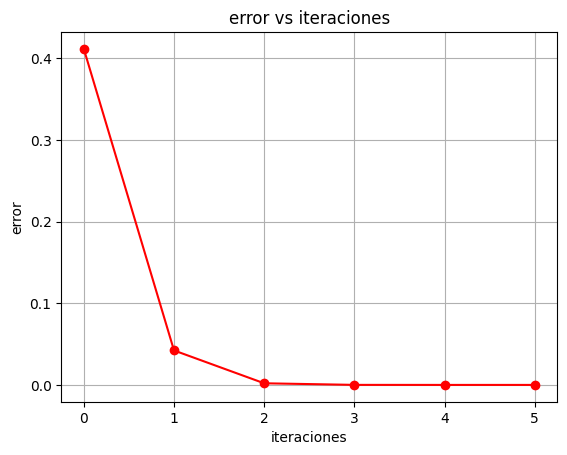

In [ ]:
plt.plot(N, err, 'ro-')
plt.title('error vs iteraciones')
plt.xlabel('iteraciones')
plt.ylabel('error')
plt.grid()
plt.show()

In [ ]:
x = math.radians(80)
tol_= np.finfo(np.float32).eps #epsilon de la maquina
max_iteraciones, sin32, real32 = taylor_sin32(x, tol_)
print(f'el valor de seno con {max_iteraciones} iteraciones es {sin}')

el valor de seno con 10 iteraciones es 0.9848077530122078


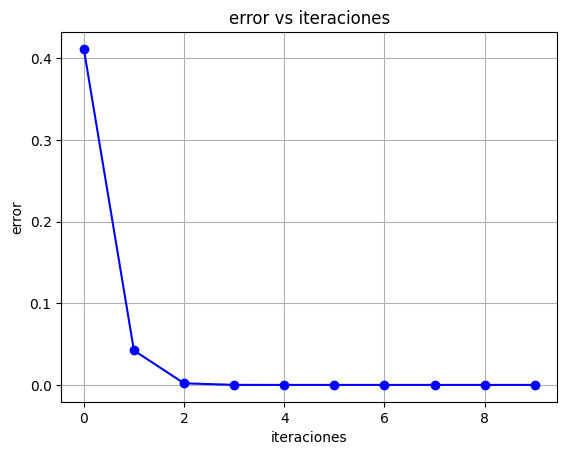

In [ ]:
#c)
def taylor_sin64 (angulo, tol):
  max_iteraciones = 100
  sin64 = 0
  real64 = np.float64(math.sin(angulo))
  i = 0
  errors = np.zeros(max_iteraciones) #guardar error
  iteraciones = np.arange(max_iteraciones) #iteracion asociada el error

  while abs(real64 - sin64) > tol:
    sin64 += ((-1)**i) * (angulo**(2*i+1))/math.factorial(2*i+1)
    error = abs(real64 - sin64)
    errors[i] = error
    i += 1
    if i > max_iteraciones:
      print('se alcanzó el número máximo de iteraciones')
      break
  return errors[:i], iteraciones[:i], sin64, real64

x = np.float64(math.radians(80))
tol_= np.finfo(np.float64).eps #epsilon de la maquina
err, N, sin64, real64= taylor_sin64(x, tol_)
print(f'el valor de seno con {len(N)} iteraciones es {sin}')

plt.plot(N, err, 'bo-')
plt.title('error vs iteraciones')
plt.xlabel('iteraciones')
plt.ylabel('error')
plt.grid()
plt.show()

In [ ]:
# d)
def percentage_error(approx_value, exact_value):
    return abs(((exact_value - approx_value) / exact_value) * 100)

# Calcular errores porcentuales para float32 y float64
error_percent_float32 = percentage_error(sin32, real32)
error_percent_float64 = percentage_error(sin64, real64)

print(f' el error para 32 bits es ({error_percent_float32})% y el error para 64 es ({error_percent_float64})%')


 el error para 32 bits es (1.238574693965129e-06)% y el error para 64 es (2.2547000086653338e-14)%


#2. Serie Exponencial
Considere la serie para $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

a. Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}


b. Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

c. Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


d. Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, usa el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


e. Realiza una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [ ]:
# Aqui va su código

In [ ]:
import numpy as np
import math

# Definimos la serie de la exponencial para e^-x
def exp_series_neg(x, N):
    """Calcula la serie de Taylor truncada de e^(-x) hasta N términos."""
    return sum((-1)**n * x**n / math.factorial(n) for n in range(N + 1))

# Parámetros para los cálculos
x = 1  # Limitamos x <= 1
N_optimal = None
threshold = 1e-7  # Umbral para considerar el error

# Calcular N óptimo
for N in range(1, 101):
    series_value = exp_series_neg(x, N)
    next_term = abs((-1)**(N + 1) * x**(N + 1) / math.factorial(N + 1))

    # Comparamos si el siguiente término es menor que el 10^-7 de la suma actual
    if next_term <= threshold * abs(series_value):
        N_optimal = N
        print(f"N óptimo encontrado: {N_optimal}")
        break

# Valor calculado con la serie de Taylor
series_value = exp_series_neg(x, N_optimal)
print(f"\nValor calculado usando la serie de Taylor con N = {N_optimal}: e^(-{x}) ≈ {series_value:.6e}")

# Valor calculado con la función np.exp(x) (asumida como exacta)
exact_value = np.exp(-x)
print(f"Valor calculado usando np.exp(-{x}): {exact_value:.6e}")

# Comparación de errores
error = abs(series_value - exact_value)
print(f"Error absoluto entre la serie de Taylor y np.exp(-{x}): {error:.6e}")

# Conclusión
if error < threshold:
    print("\nConclusión: La serie de Taylor converge correctamente y es precisa para x ≤ 1.")
else:
    print("\nConclusión: La serie de Taylor no es lo suficientemente precisa para x = 1.")


N óptimo encontrado: 10

Valor calculado usando la serie de Taylor con N = 10: e^(-1) ≈ 3.678795e-01
Valor calculado usando np.exp(-1): 3.678794e-01
Error absoluto entre la serie de Taylor y np.exp(-1): 2.311427e-08

Conclusión: La serie de Taylor converge correctamente y es precisa para x ≤ 1.


In [ ]:
#b
import numpy as np
import math

# serie en x ≈ 10
x_large = 10
print(f"Calculando la serie de Taylor para e^(-{x_large})...")
print(f"N óptimo = 45 encontrado reemplazando en la funcion definida en a.")

# Generar términos de la serie
series_terms = [(((-1)**n)* (x_large**n / math.factorial(n))) for n in range(46)] #45+1

# Sumar los términos acumulativamente para observar cancelaciones
series_sum = np.cumsum(series_terms)

print("\nTérminos de la serie:")
for i, term in enumerate(series_terms):
    print(f"Término {i}: {term:.15f}")

print("\nSuma acumulativa de los términos:")
for i, cumulative in enumerate(series_sum):
    print(f"Suma hasta el término {i}: {cumulative:.15f}")

# Observación sobre cancelaciones
print(f"\nAl observar los términos y sus sumas, podemos notar que los términos grandes se cancelan entre sí,")
print(f"lo que resulta en una suma final que puede ser significativamente más pequeña que los términos individuales.")

# Identificación de la cancelación casi perfecta en n ≈ x - 1
n_cancellation = x_large - 1
print(f"\nCancelación casi perfecta observada en n = {n_cancellation}:")
print(f"Término {n_cancellation}: {series_terms[n_cancellation]:.6f}")
print(f"Término {n_cancellation + 1}: {series_terms[n_cancellation + 1]:.6f}")
print(f"Suma acumulativa en n = {n_cancellation}: {series_sum[n_cancellation]:.6f}")
print(f"Suma acumulativa en n = {n_cancellation + 1}: {series_sum[n_cancellation + 1]:.6f}")


Calculando la serie de Taylor para e^(-10)...
N óptimo = 45 encontrado reemplazando en la funcion definida en a.

Términos de la serie:
Término 0: 1.000000000000000
Término 1: -10.000000000000000
Término 2: 50.000000000000000
Término 3: -166.666666666666657
Término 4: 416.666666666666686
Término 5: -833.333333333333371
Término 6: 1388.888888888888914
Término 7: -1984.126984126984098
Término 8: 2480.158730158730123
Término 9: -2755.731922398589177
Término 10: 2755.731922398589177
Término 11: -2505.210838544172020
Término 12: 2087.675698786809789
Término 13: -1605.904383682161551
Término 14: 1147.074559772972407
Término 15: -764.716373181981680
Término 16: 477.947733238738522
Término 17: -281.145725434552048
Término 18: 156.192069685862265
Término 19: -82.206352466243303
Término 20: 41.103176233121651
Término 21: -19.572941063391262
Término 22: 8.896791392450574
Término 23: -3.868170170630684
Término 24: 1.611737571096118
Término 25: -0.644695028438447
Término 26: 0.247959626322480
Térmi

In [ ]:
#c
import numpy as np
import math

# Parte (c): Comparar la serie de Taylor con 1/exp(x) para x ≈ 10 con N optimo 45
x_large = 10
print(f"Comparando la serie de Taylor de e^(-{x_large}) con la fórmula 1/e^{x_large}...")

# Calcular el valor de la serie de Taylor
series_value = exp_series_neg(x_large, 45)
print(f"\nValor calculado usando la serie de Taylor: e^(-{x_large}) ≈ {series_value:.6e}")

# Calcular el valor usando la fórmula 1/exp(x)
inverse_exp = 1 / np.exp(x_large)
print(f"Valor calculado usando la fórmula 1/e^{x_large}: {inverse_exp:.6e}")

# Comparación de resultados
error_series = abs(series_value - np.exp(-x_large))
error_inverse = abs(inverse_exp - np.exp(-x_large))

print(f"\nError absoluto de la serie de Taylor: {error_series:.6e}")
print(f"Error absoluto de la fórmula 1/e^{x_large}: {error_inverse:.6e}")

# Respuesta a la pregunta
if error_inverse < error_series:
    print("\nConclusión: Usar la fórmula 1/e^x proporciona una mejor precisión que la serie de Taylor para valores grandes de x.")
else:
    print("\nConclusión: La serie de Taylor proporciona una mejor precisión que la fórmula 1/e^x, lo cual es inesperado.")


Comparando la serie de Taylor de e^(-10) con la fórmula 1/e^10...

Valor calculado usando la serie de Taylor: e^(-10) ≈ 4.539993e-05
Valor calculado usando la fórmula 1/e^10: 4.539993e-05

Error absoluto de la serie de Taylor: 1.826392e-12
Error absoluto de la fórmula 1/e^10: 6.776264e-21

Conclusión: Usar la fórmula 1/e^x proporciona una mejor precisión que la serie de Taylor para valores grandes de x.


In [ ]:
#d
def exp_series_neg(x, N):
    """Calcula la serie de Taylor truncada de e^(-x) hasta N términos."""
    return sum((-1)**n * x**n / math.factorial(n) for n in range(N + 1))

# Parámetros
threshold = 1e-7  # Error máximo permitido
N_max = 100  # Máximo número de términos a evaluar, porque si no esto se... explota
tolerance = 1e-8  # Tolerancia relativa para detectar falta de convergencia

# Función N óptimo
def find_optimal_N(x, N_max, threshold):
    """Encuentra el valor óptimo de N para que el error de la serie de Taylor esté por debajo del umbral."""
    for N in range(1, N_max + 1):
        series_value = exp_series_neg(x, N)
        exact_value = np.exp(-x)
        error = abs(series_value - exact_value)
        if error < threshold:
            return N
    return N_max

# Verificamos si el error se estabiliza o deja de mejorar significativamente
def check_convergence(x, N_max, tolerance):
    """Verifica cuándo la serie deja de converger para un valor de x"""
    prev_error = None
    for N in range(1, N_max + 1):
        series_value = exp_series_neg(x, N)
        exact_value = np.exp(-x)
        error = abs(series_value - exact_value)

        if prev_error is not None:
            if abs(error - prev_error) / max(prev_error, tolerance) < tolerance:
                return N - 1  # La serie deja de mejorar significativamente
        prev_error = error

    return N_max  # Si sigue mejorando hasta el final

# Progresivamente incrementamos x de 1 a 10
print("Incrementando x de 1 a 10:")
for x in np.linspace(1, 10, 10):
    N_optimal = find_optimal_N(x, N_max, threshold)
    N_convergence = check_convergence(x, N_max, tolerance)

    # error para N op
    series_value_opt = exp_series_neg(x, N_optimal)
    exact_value = np.exp(-x)
    error_opt = abs(series_value_opt - exact_value)

    #error para N_optimal - 1
    if N_optimal > 1:
        series_value_opt_minus_1 = exp_series_neg(x, N_optimal - 1)
        error_opt_minus_1 = abs(series_value_opt_minus_1 - exact_value)

        print(f"\nPara x = {x:.2f}:")
        print(f"  N óptimo = {N_optimal}, error con N = {N_optimal}: {error_opt:.6e}")
        print(f"  Error con N = {N_optimal - 1}: {error_opt_minus_1:.6e}")

        if error_opt_minus_1 > threshold:
            print(f"  La serie empieza a perder precisión con N = {N_optimal - 1}, ya que el error supera el umbral de {threshold:.1e}.")
        else:
            print(f"  La serie aún mantiene precisión con N = {N_optimal - 1}.")
    else:
        print(f"\nPara x = {x:.2f}, el número óptimo de términos es N = {N_optimal} (no es posible calcular para N = {N_optimal - 1}).")

    #cuándo la serie ya no converge
    if N_convergence < N_max:
        print(f"  La serie deja de mejorar significativamente a partir de N = {N_convergence}.")
    else:
        print(f"  La serie aún mejora hasta N = {N_max}.")

# Incrementando progresivamente x de 10 a 100
print("\nIncrementando x de 10 a 100:")
for x in np.linspace(10, 100, 10):
    N_optimal = find_optimal_N(x, N_max, threshold)
    N_convergence = check_convergence(x, N_max, tolerance)

    #err para N opt
    series_value_opt = exp_series_neg(x, N_optimal)
    exact_value = np.exp(-x)
    error_opt = abs(series_value_opt - exact_value)

    #err para N_optimal - 1
    if N_optimal > 1:
        series_value_opt_minus_1 = exp_series_neg(x, N_optimal - 1)
        error_opt_minus_1 = abs(series_value_opt_minus_1 - exact_value)

        print(f"\nPara x = {x:.2f}:")
        print(f"  N óptimo = {N_optimal}, error con N = {N_optimal}: {error_opt:.6e}")
        print(f"  Error con N = {N_optimal - 1}: {error_opt_minus_1:.6e}")

        if error_opt_minus_1 > threshold:
            print(f"  La serie empieza a perder precisión con N = {N_optimal - 1}, ya que el error supera el umbral de {threshold:.1e}.")
        else:
            print(f"  La serie aún mantiene precisión con N = {N_optimal - 1}.")
    else:
        print(f"\nPara x = {x:.2f}, el número óptimo de términos es N = {N_optimal} (no es posible calcular para N = {N_optimal - 1}).")

    #la serie ya no converge
    if N_convergence < N_max:
        print(f"  La serie deja de mejorar significativamente a partir de N = {N_convergence}.")
    else:
        print(f"  La serie aún mejora hasta N = {N_max}.")


print("\nObservaciones:")
print("El programa ha determinado experimentalmente el número óptimo de términos (N) para que la serie de Taylor para e^(-x) conserve la precisión.")
print("Además, se ha comprobado cuándo la serie empieza a perder precisión y cuándo deja de mejorar significativamente al agregar más términos.")


Incrementando x de 1 a 10:

Para x = 1.00:
  N óptimo = 10, error con N = 10: 2.311427e-08
  Error con N = 9: 2.524589e-07
  La serie empieza a perder precisión con N = 9, ya que el error supera el umbral de 1.0e-07.
  La serie deja de mejorar significativamente a partir de N = 17.

Para x = 2.00:
  N óptimo = 14, error con N = 14: 2.225742e-08
  Error con N = 13: 1.656793e-07
  La serie empieza a perder precisión con N = 13, ya que el error supera el umbral de 1.0e-07.
  La serie deja de mejorar significativamente a partir de N = 23.

Para x = 3.00:
  N óptimo = 17, error con N = 17: 5.221060e-08
  Error con N = 16: 3.108614e-07
  La serie empieza a perder precisión con N = 16, ya que el error supera el umbral de 1.0e-07.
  La serie deja de mejorar significativamente a partir de N = 27.

Para x = 4.00:
  N óptimo = 20, error con N = 20: 7.276249e-08
  Error con N = 19: 3.791717e-07
  La serie empieza a perder precisión con N = 19, ya que el error supera el umbral de 1.0e-07.
  La seri

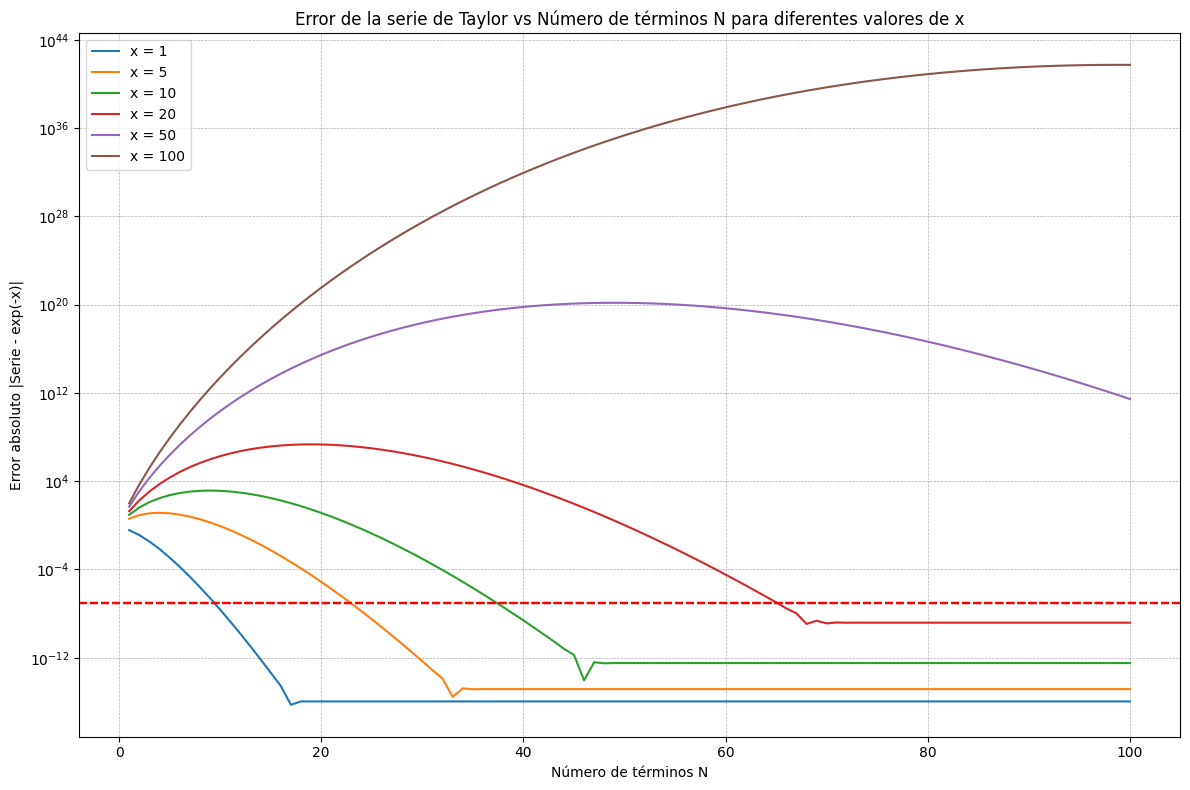

In [ ]:
#e
import matplotlib.pyplot as plt

# Función para calcular la serie de Taylor truncada de e^-x
def exp_series_neg(x, N):
    """Calcula la serie de Taylor truncada de e^(-x) hasta N términos."""
    return sum((-1)**n * x**n / math.factorial(n) for n in range(N + 1))

# x a analizar
x_values = [1, 5, 10, 20, 50, 100]
N_max = 100  # Número máximo
threshold = 1e-7  # Umbral de error


plt.figure(figsize=(12, 8))

# Loop a través de los valores de x
for i, x in enumerate(x_values):
    errors = []  # Lista para almacenar los errores
    N_values = list(range(1, N_max + 1))  # Valores de N

    # Calcular el error para cada N
    for N in N_values:
        series_value = exp_series_neg(x, N)
        exact_value = np.exp(-x)
        error = abs(series_value - exact_value)
        errors.append(error)

    # Crear la gráfica
    plt.plot(N_values, errors, label=f'x = {x}')

    # Añadir una línea horizontal que muestre el umbral del error
    plt.axhline(y=threshold, color='r', linestyle='--')

# Configuración de la gráfica
plt.yscale('log')  # eje Y (error)
plt.xscale('linear')  # eje X (N)
plt.xlabel('Número de términos N')
plt.ylabel('Error absoluto |Serie - exp(-x)|')
plt.title('Error de la serie de Taylor vs Número de términos N para diferentes valores de x')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


# 3. Serie $S_N$

Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados númericos  pueden tener diferencias.


a.  Escribir tres funciones para que realicen el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$


b. Estudiar la convergencia de la serie para los tres casos.


c. Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $$E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|,$$ $i = 1, 2$. Considere valores de $N = 1\times 10^{6}$.

d. Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

In [ ]:
# Aqui va su código

In [ ]:
#a

def S1(N):
    return sum((-1)**n * n / (n + 1) for n in range(1, 2*N + 1))

def S2(N):
    sum_even = sum((2*n - 1)/(2*n) for n in range(1, N + 1))  # Suma de términos impares
    sum_odd = sum((2*n)/(2*n + 1) for n in range(1, N + 1))  # Suma de términos pares
    s = -sum_even + sum_odd
    return s


def S3(N):
    return sum(1 / (2*n * (2*n + 1)) for n in range(1, N + 1))


In [ ]:
#b
# Valores de N
N_values = [10, 100, 1000, 10000, 100000, 1000000]
results_S1 = []
results_S2 = []
results_S3 = []

for N, s1, s2, s3 in zip(N_values, results_S1, results_S2, results_S3):
    print(f"{N}\t{s1:.10f}\t{s2:.10f}\t{s3:.10f}")
for N in N_values:
    s1 = S1(N)
    s2 = S2(N)
    s3 = S3(N)

    results_S1.append(s1)
    results_S2.append(s2)
    results_S3.append(s3)

print("Resultados de las series:")
print("N\tS(1)\t\tS(2)\t\tS(3)")
for N, s1, s2, s3 in zip(N_values, results_S1, results_S2, results_S3):
    print(f"{N}\t{s1:.10f}\t{s2:.10f}\t{s3:.10f}")


print("\nA medida que N aumenta, los valores de S(1), S(2), y S(3) tienden al mismo valor")


Resultados de las series:
N	S(1)		S(2)		S(3)
10	0.2836095492	0.2836095492	0.2836095492
100	0.3043714451	0.3043714451	0.3043714451
1000	0.3066030068	0.3066030068	0.3066030068
10000	0.3068278213	0.3068278213	0.3068278213
100000	0.3068503195	0.3068503183	0.3068503195
1000000	0.3068525694	0.3068525746	0.3068525694

A medida que N aumenta, los valores de S(1), S(2), y S(3) tienden al mismo valor


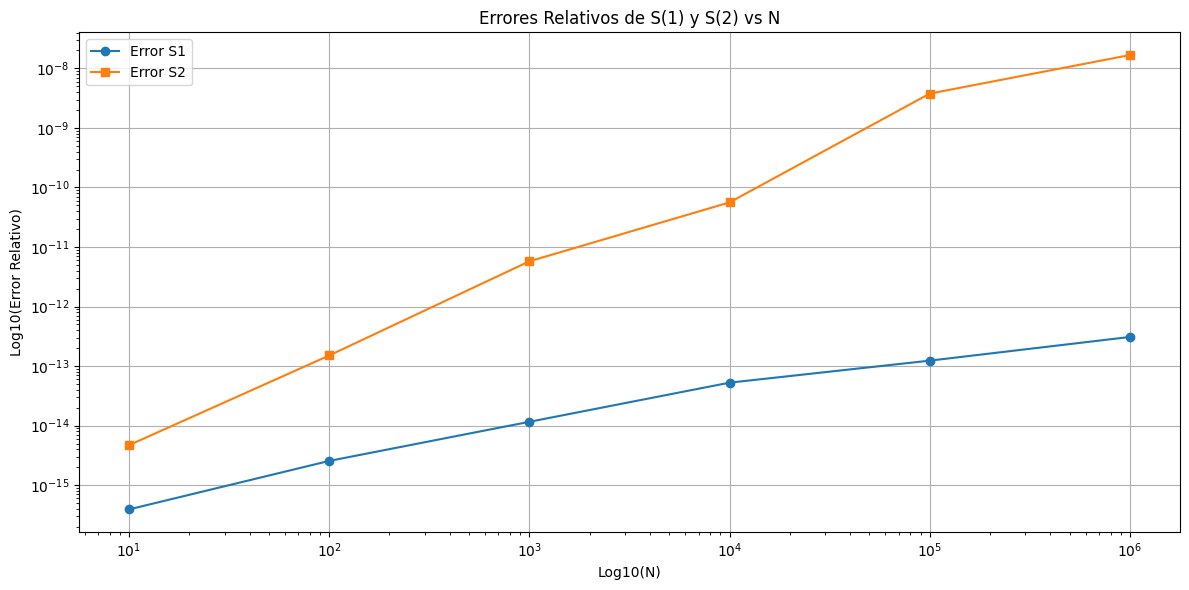

In [ ]:
#c
errors_S1 = []
errors_S2 = []

for N in N_values:
    s1 = S1(N)
    s2 = S2(N)
    s3 = S3(N)

    results_S1.append(s1)
    results_S2.append(s2)
    results_S3.append(s3)

    # Calcular errores relativos
    E1 = abs((s1 - s3) / s3)
    E2 = abs((s2 - s3) / s3)

    errors_S1.append(E1)
    errors_S2.append(E2)
plt.figure(figsize=(12, 6))

plt.loglog(N_values, errors_S1, label='Error S1', marker='o')
plt.loglog(N_values, errors_S2, label='Error S2', marker='s')

plt.title('Errores Relativos de S(1) y S(2) vs N')
plt.xlabel('Log10(N)')
plt.ylabel('Log10(Error Relativo)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Los resultados de las series muestran que:

* Todas las series convergen hacia el mismo  valor a medida que N aumenta, pero la rapidez de convergencia puede variar.

* La precisión de las aproximaciones puede ser evaluada a través de los errores relativos, que decrecen con el aumento de N. Si consideramos que la S3 es exacta, la serie S1 puede ser más precisa que S2 según los resultados.

* El costo computacional es un factor crucial; mientras más eficiente sea la implementación de una serie, más práctica será para su uso en aplicaciones reales.Por esto, es mas facil implementar la funcion dictada por S1.
